In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack


# Numpy Tutorials: Fast Fourier Transform: The First Three Natural Frequencies

### What is Fast Fourier Transform (FFT)?

   A Fast Fourier Transform is a fundamental concept in the world of engineering. It is specifically used in the field of vibrations and measuring frequencies of various devices. FFT is primarily used to compute discrete functions, such as trigonometric functions, time it takes to complete a cycle, etc. Whereas, the FFT utilizes signals of any device/function and converts them from time domains into frequency domains [1] . As a result, we are able to associate frequencies to the devices at certain vibrations at certain times. In turn, the correlated frequencies are considered to be "natural frequencies" due to the vibrations being unforced [2]. 
   

#### Example 1: Associating Natural Frequencies to a Sine Function

For the first example of setting up a Fast Fourier Transform, we will take a look into a sin wave and generate it's natural frequencies at each peak.
     We will define a sin wave in terms of frequency, a certain value of samples over a certain time frame, in this case a 100 Hz wave frequency over a 10 second period:

In [3]:
N_freq = 100 #sample size of frequencies, in terms of Hertz
time = 10 #duration of sin function, in terms of seconds
wave_freq = N_freq * time #this outputs a wave frequency over the given time frame

#define a sine wave function in terms of the listed variables
def sine_function(frequency, N_freq, time):
    x = np.linspace(0, time, wave_freq) 
    y = np.sin((2 * np.pi * x)) #sine function that utilizes the variables associated with 'x'
    return x,y

Once defining the sine wave function that implements frequency over a certain period of time, we can proceed to graph this data to output a sine wave graph:

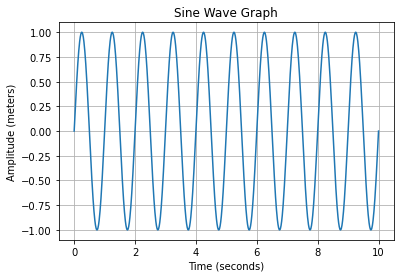

In [17]:
x, y = sine_function(100, N_freq, time) #x and y variables are 'returned' when we define the function
plt.title('Sine Wave Graph')
plt.plot(x, y)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (meters)')
plt.grid('True')
plt.show()

Now that we have created a sine wave, we can generate a code to convert this function to output corresponding natural frequencies, in order to get started we will use the Numpy scipy.fft function. With this function we will be able to create a FFT for a provided function, in this case, we will use this to create a transform of the sine function. We can test several different range options to view the 1st, 2nd, 3rd, etc. frequencies from the sine wave graph:

No handles with labels found to put in legend.


(0.0, 2.0)

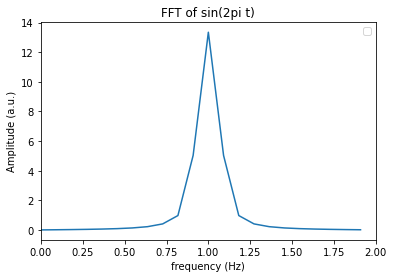

In [61]:
N_freq = 100 
time = 10 
wave_freq = N_freq * time
x = np.linspace(0, time, wave_freq)
y = np.sin((2 * np.pi * x))
func = np.fft.fft(y)

for N in [20]:
    step = (10) / (N+1)
    t = np.arange(0,10+step, step)
    func= np.sin(2*np.pi*t)
    FFT= np.fft.fft(func)
    freq_step = (N/time) / len(FFT)
    freqs = np.arange(0,N/time, freq_step)
    plt.plot(freqs, np.absolute(FFT))
plt.xlabel('frequency (Hz)')
plt.ylabel('Amplitude (a.u.)')
plt.title('FFT of sin(2pi t)')
plt.legend()
plt.xlim((0,2))

No handles with labels found to put in legend.


(0.0, 3.0)

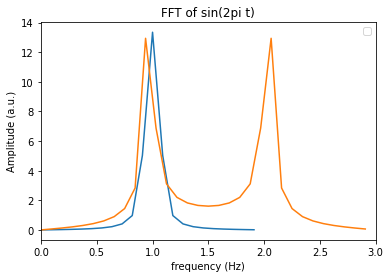

In [58]:
for N in [20, 30]:
    step = (10) / (N+1)
    t = np.arange(0,10+step, step)
    func= np.sin(2*np.pi*t)
    FFT= np.fft.fft(func)
    freq_step = (N/time) / len(FFT)
    freqs = np.arange(0,N/time, freq_step)
    plt.plot(freqs, np.absolute(FFT))
plt.xlabel('frequency (Hz)')
plt.ylabel('Amplitude (a.u.)')
plt.title('FFT of sin(2pi t)')
plt.legend()
plt.xlim((0,3))

No handles with labels found to put in legend.


(0.0, 4.0)

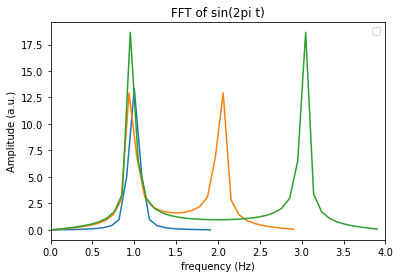

In [59]:
for N in [20,30,40]:
    step = (10) / (N+1)
    t = np.arange(0,10+step, step)
    func= np.sin(2*np.pi*t)
    FFT= np.fft.fft(func)
    freq_step = (N/time) / len(FFT)
    freqs = np.arange(0,N/time, freq_step)
    plt.plot(freqs, np.absolute(FFT))
plt.xlabel('frequency (Hz)')
plt.ylabel('Amplitude (a.u.)')
plt.title('FFT of sin(2pi t)')
plt.legend()
plt.xlim((0,4))

As the range increased, we are able to obtain more FFT/natural frequencies from the original sine function from above.

Sources:


    1. https://www.princeton.edu/~cuff/ele201/kulkarni_text/frequency.pdf 
    2.https://www.brown.edu/Departments/Engineering/Courses/En4/Notes/vibrations_free_undamped/vibrations_free_undamped.htm
        

### Example 2: Using FFT in relation to beam mechanics

Another way we are able to implement the FFT is by applying to an actual object. For instance, we can take a look at a cantilever beam that is attached to a strain gauge. We then apply a force to the free end of the beam and let it vibrate for a certain time frame. Then by using the labview workbench, it can output the following frequencies as shown below: